In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [24]:
df = pd.read_csv("../dataset/processed/monthly_revenue_profit.csv")
df['month_start'] = pd.to_datetime(df['month_start'])
df = df.sort_values('month_start')
df

,month_start,monthly_revenue,monthly_profit
0,2022-01-01,437431.3,43521.3
1,2022-02-01,444011.1,47461.1
2,2022-03-01,394105.2,33915.2
3,2022-04-01,476400.9,42620.9
4,2022-05-01,413625.5,35745.5
5,2022-06-01,465300.3,41220.3
6,2022-07-01,375278.4,35938.4
7,2022-08-01,534562.4,61852.4
8,2022-09-01,433887.0,41067.0
9,2022-10-01,601707.8,50857.8


In [7]:
#Revenue dataset
revenue_df = df[['month_start', 'monthly_revenue']].rename(
    columns={'month_start': 'ds', 'monthly_revenue': 'y'}
)

In [9]:
revenue_df

,ds,y
0,2022-01-01,437431.3
1,2022-02-01,444011.1
2,2022-03-01,394105.2
3,2022-04-01,476400.9
4,2022-05-01,413625.5
5,2022-06-01,465300.3
6,2022-07-01,375278.4
7,2022-08-01,534562.4
8,2022-09-01,433887.0
9,2022-10-01,601707.8


In [8]:
# Profit dataset
profit_df = df[['month_start', 'monthly_profit']].rename(
    columns={'month_start': 'ds', 'monthly_profit': 'y'}
)

In [10]:
profit_df

,ds,y
0,2022-01-01,43521.3
1,2022-02-01,47461.1
2,2022-03-01,33915.2
3,2022-04-01,42620.9
4,2022-05-01,35745.5
5,2022-06-01,41220.3
6,2022-07-01,35938.4
7,2022-08-01,61852.4
8,2022-09-01,41067.0
9,2022-10-01,50857.8


In [11]:
revenue_model = Prophet()
revenue_model.fit(revenue_df)

19:32:41 - cmdstanpy - INFO - Chain [1] start processing
19:32:42 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future_revenue = revenue_model.make_future_dataframe(periods=12, freq='MS')

In [13]:
forecast_revenue = revenue_model.predict(future_revenue)

In [14]:
forecast_revenue

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,453603.618140,334937.800376,570985.489010,453603.618140,453603.618140,0.0,0.0,0.0,0.0,0.0,0.0,453603.618140
1,2022-02-01,454316.515683,338776.685853,571090.361597,454316.515683,454316.515683,0.0,0.0,0.0,0.0,0.0,0.0,454316.515683
2,2022-03-01,454960.423129,347842.772048,567555.747366,454960.423129,454960.423129,0.0,0.0,0.0,0.0,0.0,0.0,454960.423129
3,2022-04-01,455673.320664,338799.535636,571554.861868,455673.320664,455673.320664,0.0,0.0,0.0,0.0,0.0,0.0,455673.320664
4,2022-05-01,456363.221496,341072.977893,577336.373801,456363.221496,456363.221496,0.0,0.0,0.0,0.0,0.0,0.0,456363.221496
5,2022-06-01,457076.119014,339087.408231,575287.800305,457076.119014,457076.119014,0.0,0.0,0.0,0.0,0.0,0.0,457076.119014
6,2022-07-01,457766.019834,326524.847610,572164.626471,457766.019834,457766.019834,0.0,0.0,0.0,0.0,0.0,0.0,457766.019834
7,2022-08-01,458478.917355,349151.587238,580582.846054,458478.917355,458478.917355,0.0,0.0,0.0,0.0,0.0,0.0,458478.917355
8,2022-09-01,459191.814869,347772.666543,561932.202806,459191.814869,459191.814869,0.0,0.0,0.0,0.0,0.0,0.0,459191.814869
9,2022-10-01,459881.715696,348954.257584,583329.314100,459881.715696,459881.715696,0.0,0.0,0.0,0.0,0.0,0.0,459881.715696


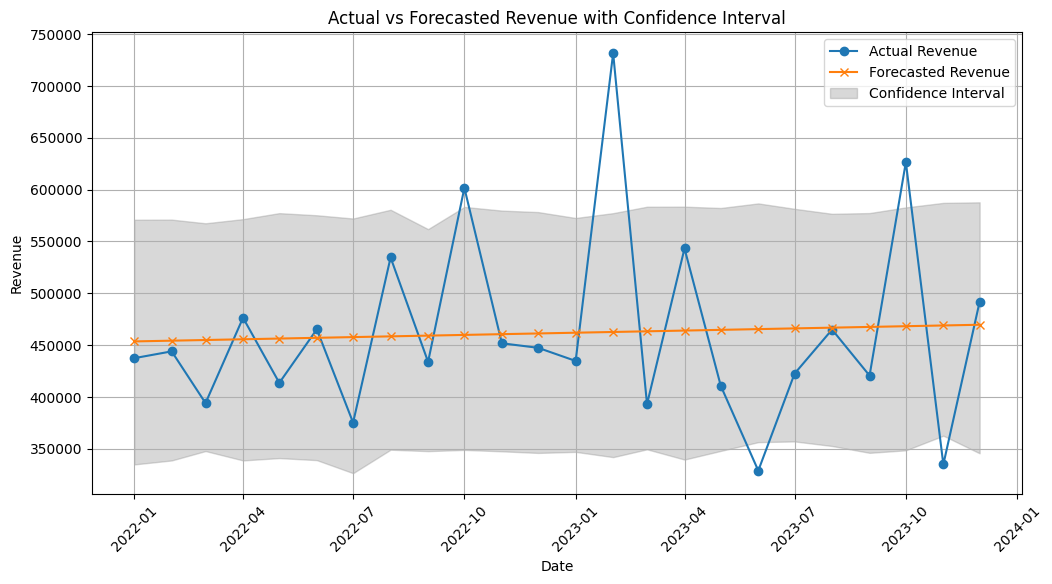

In [26]:
forecast_24 = forecast_revenue[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(24)
actual_24 = revenue_df[['ds', 'y']].head(24)

# Merge data on 'ds' so we can compare side by side
compare_df = pd.merge(actual_24, forecast_24, on='ds')

plt.figure(figsize=(12,6))
plt.plot(compare_df['ds'], compare_df['y'], label='Actual Revenue', marker='o')
plt.plot(compare_df['ds'], compare_df['yhat'], label='Forecasted Revenue', marker='x')

# Add shaded area for confidence interval
plt.fill_between(compare_df['ds'], compare_df['yhat_lower'], compare_df['yhat_upper'], 
                 color='gray', alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Actual vs Forecasted Revenue with Confidence Interval')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [15]:
profit_model = Prophet()
profit_model.fit(profit_df)

19:34:02 - cmdstanpy - INFO - Chain [1] start processing
19:34:02 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future_profit = profit_model.make_future_dataframe(periods=12, freq='MS')
forecast_profit = profit_model.predict(future_profit)

In [19]:
forecast_profit

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,43380.625529,31219.290647,57278.711984,43380.625529,43380.625529,0.0,0.0,0.0,0.0,0.0,0.0,43380.625529
1,2022-02-01,43375.898003,30196.452139,56758.586390,43375.898003,43375.898003,0.0,0.0,0.0,0.0,0.0,0.0,43375.898003
2,2022-03-01,43371.627980,30171.673050,55959.036719,43371.627980,43371.627980,0.0,0.0,0.0,0.0,0.0,0.0,43371.627980
3,2022-04-01,43366.900455,30573.933345,55829.843420,43366.900455,43366.900455,0.0,0.0,0.0,0.0,0.0,0.0,43366.900455
4,2022-05-01,43362.325430,30739.495945,56214.862731,43362.325430,43362.325430,0.0,0.0,0.0,0.0,0.0,0.0,43362.325430
5,2022-06-01,43357.597905,30382.747636,56738.225713,43357.597905,43357.597905,0.0,0.0,0.0,0.0,0.0,0.0,43357.597905
6,2022-07-01,43353.022881,30565.324466,56149.945432,43353.022881,43353.022881,0.0,0.0,0.0,0.0,0.0,0.0,43353.022881
7,2022-08-01,43348.295355,30968.928427,55800.776489,43348.295355,43348.295355,0.0,0.0,0.0,0.0,0.0,0.0,43348.295355
8,2022-09-01,43343.567830,30635.091351,55660.261246,43343.567830,43343.567830,0.0,0.0,0.0,0.0,0.0,0.0,43343.567830
9,2022-10-01,43338.992805,30176.288962,55827.499963,43338.992805,43338.992805,0.0,0.0,0.0,0.0,0.0,0.0,43338.992805


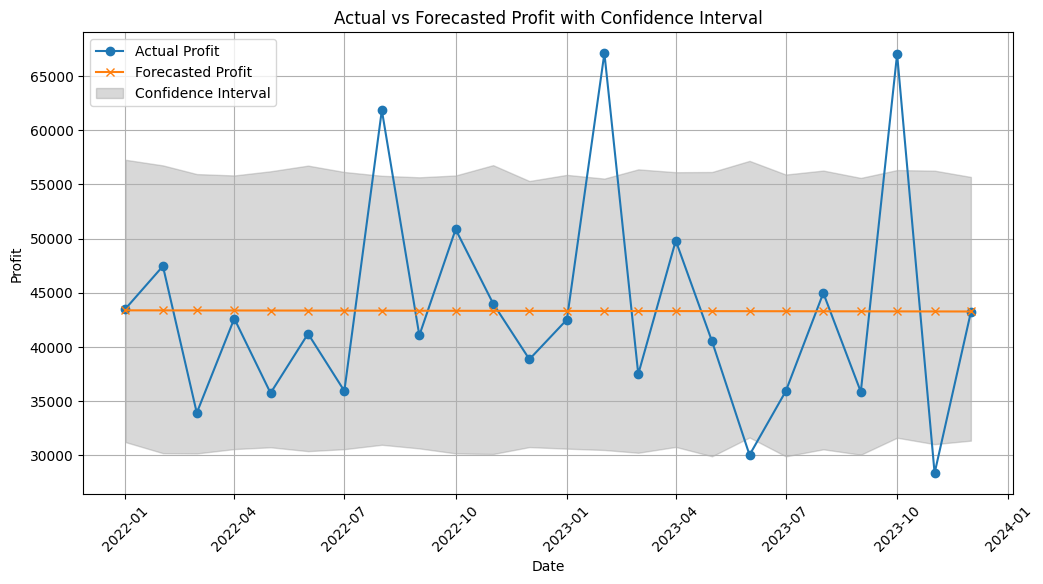

In [27]:
forecast_24 = forecast_profit[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(24)
actual_24 = profit_df[['ds', 'y']].head(24)

# Merge data on 'ds' so we can compare side by side
compare_df = pd.merge(actual_24, forecast_24, on='ds')

plt.figure(figsize=(12,6))
plt.plot(compare_df['ds'], compare_df['y'], label='Actual Profit', marker='o')
plt.plot(compare_df['ds'], compare_df['yhat'], label='Forecasted Profit', marker='x')

# Add shaded area for confidence interval
plt.fill_between(compare_df['ds'], compare_df['yhat_lower'], compare_df['yhat_upper'], 
                 color='gray', alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Actual vs Forecasted Profit with Confidence Interval')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Keep only ds and yhat
revenue_out = forecast_revenue[['ds','yhat']].rename(columns={'yhat': 'forecast_revenue'})
profit_out  = forecast_profit[['ds','yhat']].rename(columns={'yhat': 'forecast_profit'})

# Merge
forecast_final = revenue_out.merge(profit_out, on='ds')

# Save
forecast_final.to_csv("../dataset/processed/forecast.csv", index=False)


In [22]:
forecast_final

,ds,forecast_revenue,forecast_profit
0,2022-01-01,453603.618140,43380.625529
1,2022-02-01,454316.515683,43375.898003
2,2022-03-01,454960.423129,43371.627980
3,2022-04-01,455673.320664,43366.900455
4,2022-05-01,456363.221496,43362.325430
5,2022-06-01,457076.119014,43357.597905
6,2022-07-01,457766.019834,43353.022881
7,2022-08-01,458478.917355,43348.295355
8,2022-09-01,459191.814869,43343.567830
9,2022-10-01,459881.715696,43338.992805
